<a href="https://colab.research.google.com/github/abhinavbammidi1401/Tests/blob/main/Log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef,
                             confusion_matrix, roc_curve, auc, precision_recall_curve
                             )
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Data Preprocessing


In [4]:
#load dataset
data = pd.read_csv('/content/drive/MyDrive/Telco_Customer_churn.csv')

In [5]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Encode categorical variables (example: one-hot encoding)
categorical_columns = ['Contract','PaymentMethod','gender','Churn']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [11]:
#Step:2 Logistic Regression Model Building
#Split the dataset into training and testin sets (80% training, 20% testing)
X = data_encoded.drop(columns = 'Churn_Yes')
Y = data_encoded['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Build a baseline logistic regression model using default settings
baseline_model = LogisticRegression()

numeric_cols = X_train.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Train the model on the training data
baseline_model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [13]:
# Step 3: Model Evaluation and Visualization

# Evaluate the model's performance on the testing data
Y_pred = baseline_model.predict(X_test_scaled)
accuracy = print(accuracy_score(Y_test, Y_pred))
precision = print(precision_score(Y_test, Y_pred))
recall = print(recall_score(Y_test, Y_pred))
f1 = print(f1_score(Y_test, Y_pred))
roc_auc = print(roc_auc_score(Y_test, Y_pred))
kappa = print(cohen_kappa_score(Y_test, Y_pred))
mcc = print(matthews_corrcoef(Y_test, Y_pred))

0.801277501774308
0.6534653465346535
0.5308310991957105
0.5857988165680473
0.7147398739221796
0.4569176511399333
0.4611881134095311


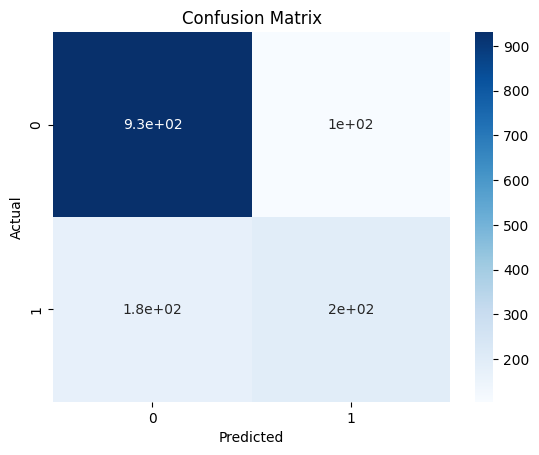

In [14]:
# Create a confusion matrix visualization
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

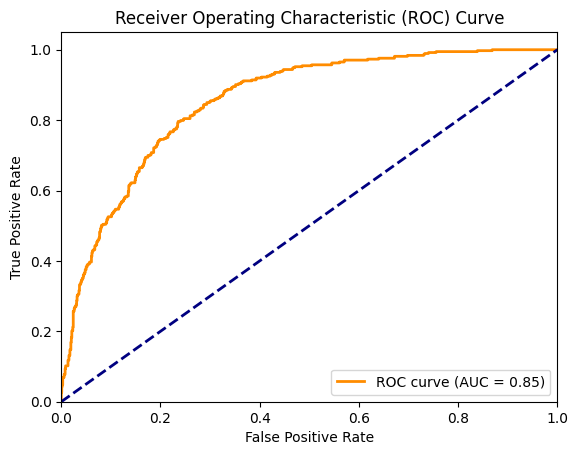

In [15]:
# Plot the ROC curve and calculate the AUC
Y_probs = baseline_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

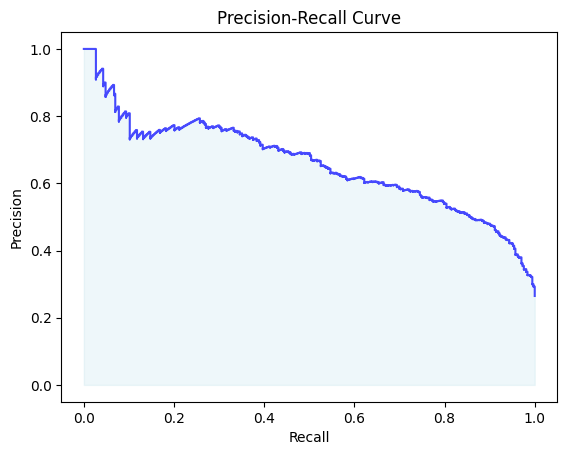

In [16]:
# Visualize the precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_probs)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='lightblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [20]:
from sklearn.metrics import log_loss
log_loss(Y_test, Y_probs)

0.40961014833817955

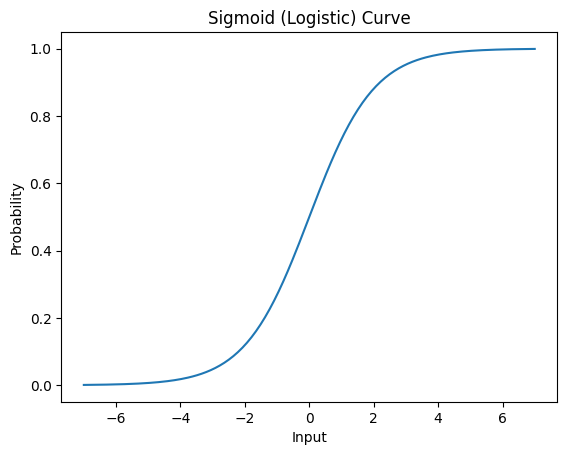

In [17]:
# Step 4: Sigmoid Curve

# Visualization of the sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_values = np.linspace(-7, 7, 200)
Y_values = sigmoid(X_values)
plt.plot(X_values, Y_values)
plt.title('Sigmoid (Logistic) Curve')
plt.xlabel('Input')
plt.ylabel('Probability')
plt.show()

In [18]:
# Step 5: Hyperparameter Tuning (Example: C parameter)

# Perform hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [19]:
# Step 6: Recommendations

# Based on your analysis, provide actionable recommendations to TelCoX on reducing customer churn.
# Analyze feature importance, gather more insights, and provide recommendations to reduce churn.

# Print best hyperparameters and evaluate the best model
print(f'Best Hyperparameters: {best_params}')
Y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(Y_test, Y_pred_best)
# Add other evaluation metrics as needed
print(f'Best Model Accuracy: {accuracy_best:.2f}')

Best Hyperparameters: {'C': 1}
Best Model Accuracy: 0.80
